# Try and pull in the original tiff and threshold it
-note - I find the original file here and then threshold it using the raster calculator in QGIS




**Date** August 2022

Import some useful modules

In [1]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
#from datacube.storage import masking
import os
#sys.path.append('../Scripts/')
#import dea_spatialtools
import pandas as pd
import numpy as np


Matplotlib is building the font cache using fc-list. This may take a moment.


In [2]:
import sys
sys.path.insert(1, '../Tools/')
import dea_tools.datahandling
from datacube.utils import masking
import dea_tools.spatial #hopefully this replaces dea_spatialtools

In [3]:
from datacube.utils.cog import write_cog

## Load in what we think the original file was

In [4]:
# Open the GeoTIFFs using rasterio

In [5]:
jun28img = '/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/Mac_14_-35_20160627__20160629.tif'

In [6]:
jun28 = xr.open_rasterio(jun28img)

I think that this is the original run of tcw stats, giving us a 'mean wet' for the 28 jun 2016. Given that this is a single observation, the mean wet is the wet value for the observation. Band 6 is the mean wetness band. 

In [35]:
jun28[5].data.mean()

-1137.6295

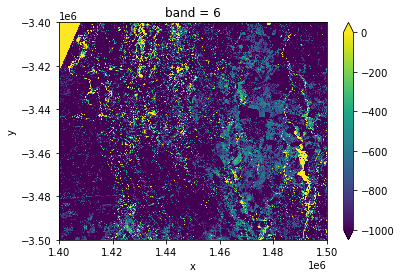

In [34]:
#this band should be mean wetness (band 6)
jun28[5].plot.imshow(cmap='viridis', vmin=-1000,vmax=0)
plt.show()

In [60]:
jun28Count = jun28[5].count()

jun28area=np.round((jun28Count*25*25)/(1000*1000),2)
print(jun28area.values,'km^2')

10000.0 km^2


In [44]:
wet_350 = jun28[5].where(jun28[5]>=-350)
wet_350 = wet_350.where(wet_350!=-1) #I don't know why this nodata value is here, it's an issue. May need to clip the data

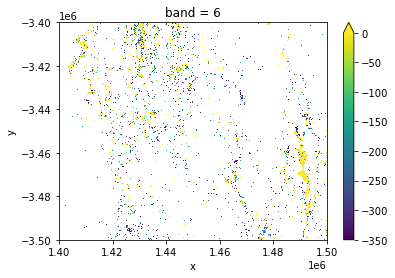

In [45]:
wet_350.plot.imshow(cmap='viridis', vmin=-350,vmax=0)
plt.show()

In [46]:
wet_350count=wet_350.where(wet_350).count()

In [51]:
print(wet_350count.data)
wet_350area=np.round((wet_350count*25*25)/(1000*1000),2)
print('AREA IS', wet_350area.data)

796311
AREA IS 497.69


In [55]:
jun28[5].size

16000000

In [12]:
#write this out as a cog
#write_cog(cewo_fix2, fname='/g/data/r78/rjd547/CEWO_Project/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/cewo_20160628_extents_2022b.tif')